# Logistic Regression Dataset Analysis
This notebook provides a step-by-step analysis of the logistic regression dataset, with code and explanations for each step.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../datasets/logistic_regression_dataset.csv')
print(df.head())

   Feature1  Feature2  Target
0  1.583892 -0.584315       0
1  0.059478  0.530778       0
2  1.991764 -2.442881       0
3  1.922561  1.729398       1
4  2.295582  1.987489       1


## Data Loading and Initial Inspection
This cell loads the logistic regression dataset and displays the first few rows for a quick overview.

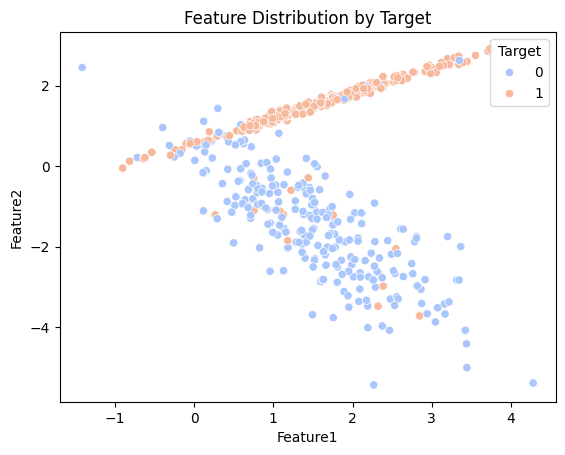

In [2]:
sns.scatterplot(x="Feature1", y="Feature2", hue="Target", data=df, palette="coolwarm")
plt.title("Feature Distribution by Target")
plt.show()

## Feature Distribution Visualization
This cell visualizes the distribution of features by target class using a scatterplot.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[["Feature1", "Feature2"]]
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data Preprocessing
This cell splits the data into training and test sets and scales the features for logistic regression.

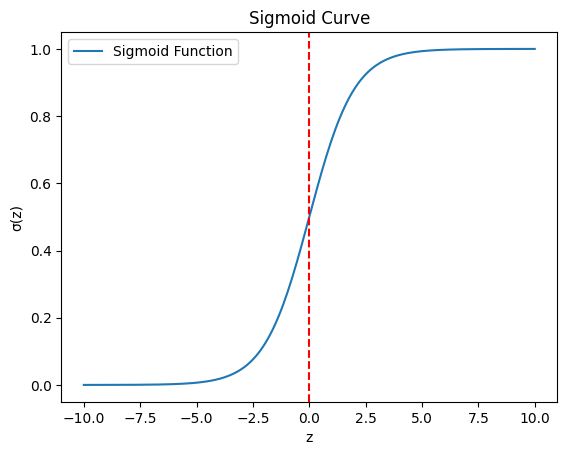

In [4]:
import numpy as np
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid, label="Sigmoid Function")
plt.axvline(0, color="r", linestyle="--")
plt.title("Sigmoid Curve")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.legend()
plt.show()

## Sigmoid Function Visualization
This cell plots the sigmoid function, which is fundamental to logistic regression.

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

## Model Training and Prediction
This cell trains a logistic regression model and makes predictions on the test set.

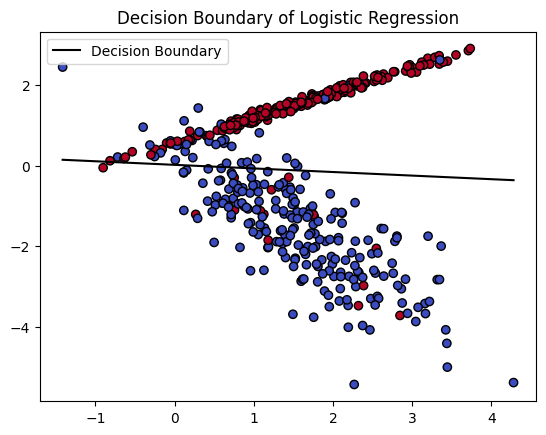

In [6]:
# Plot decision boundary
coef = model.coef_[0]
intercept = model.intercept_[0]
x_values = np.linspace(X["Feature1"].min(), X["Feature1"].max(), 100)
y_values = -(coef[0] * x_values + intercept) / coef[1]
plt.scatter(X["Feature1"], X["Feature2"], c=y, cmap="coolwarm", edgecolor="k")
plt.plot(x_values, y_values, label="Decision Boundary", color="black")
plt.legend()
plt.title("Decision Boundary of Logistic Regression")
plt.show()

## Decision Boundary Visualization
This cell plots the decision boundary of the trained logistic regression model.

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93        56
           1       0.88      0.95      0.91        44

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



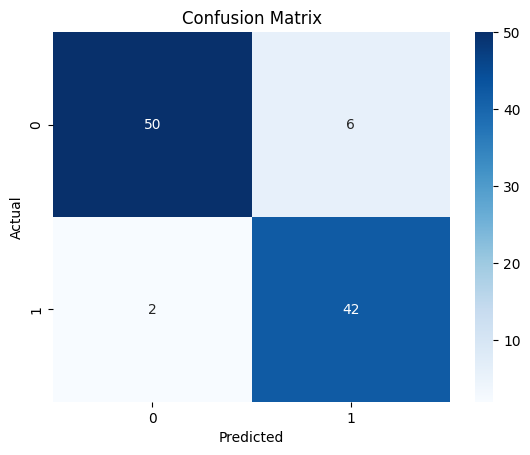

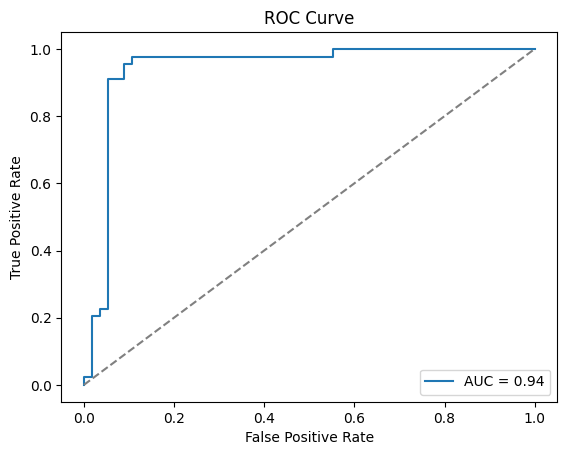

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# ROC Curve
y_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Model Evaluation
This cell evaluates the logistic regression model using accuracy, classification report, confusion matrix, and ROC curve.